# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Ensemble Techniques Project - Parkinson’s Disease


## <font color=#00b3e5> Import all the Python Libraries

In [150]:
#Enable graph plotting in Jupyter
%matplotlib inline

# Numerical libraries
import numpy as np  
# to handle data in form of rows and columns 
import pandas as pd    


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

#importing Recall and accuracy metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score
# calculate accuracy measures and confusion matrix
from sklearn import metrics

## <font color=#00b3e5> Q1. Load the dataset

In [151]:
#Read the data 
Parkinsons_df=pd.read_csv('parkinsons.data')
Parkinsons_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## <font color=#00b3e5> Q2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [152]:
Parkinsons_df.shape

(195, 24)

#### There are 195 recorded samples in the dataset and 24 different attributes

In [153]:
Parkinsons_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

#### Most of the columns depict a range of biomedical voice measurements, hence the values are in decimal form. Column "name" composed of the subject name + the recording number and can be considered as an identity column. The column named "status" is our target variable, a value of 1 means the person has the Parkinson's Disease and a value of 0 means No Parkinson's disease detected.

In [154]:
Parkinsons_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


#### The mean, median and skewness are individually plotted below.
#### Check for any missing values:

In [155]:
Parkinsons_df.apply(lambda x: sum(x.isna()))

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## <font color=#00b3e5> Q3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

### <font color=#00b3e5> Univariate Analysis

MDVP:Fo(Hz)
____________________
Mean:  154.22864102564105 
Median:  148.79 
Mode:  88.333 
Skewness:  0.5917374636540784
Positively Skewed


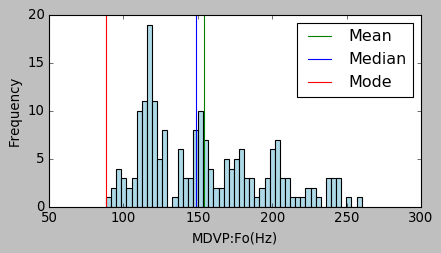


MDVP:Fhi(Hz)
____________________
Mean:  197.104917948718 
Median:  175.829 
Mode:  102.145 
Skewness:  2.542145997588398
Positively Skewed


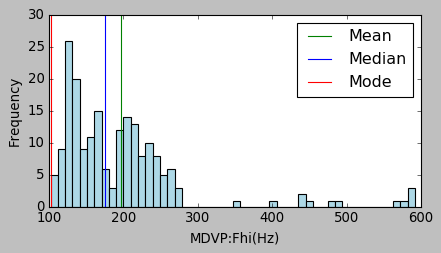


MDVP:Flo(Hz)
____________________
Mean:  116.32463076923077 
Median:  104.315 
Mode:  65.476 
Skewness:  1.217350448627808
Positively Skewed


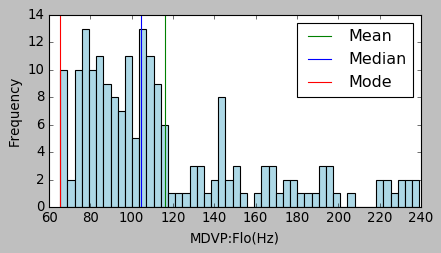


MDVP:Jitter(%)
____________________
Mean:  0.006220461538461539 
Median:  0.00494 
Mode:  0.0036899999999999997 
Skewness:  3.0849462014441817
Positively Skewed


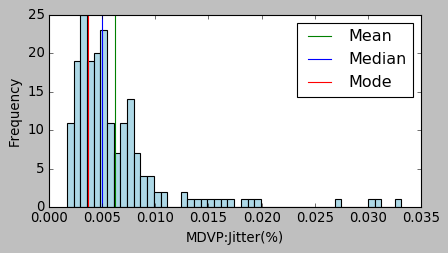


MDVP:Jitter(Abs)
____________________
Mean:  4.395897435897438e-05 
Median:  2.9999999999999997e-05 
Mode:  2.9999999999999997e-05 
Skewness:  2.6490714165257274
Positively Skewed


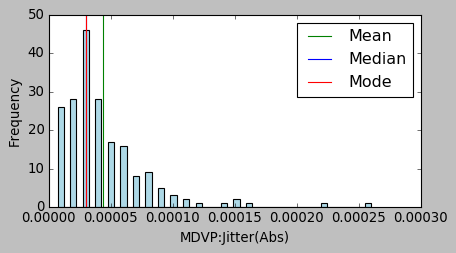


MDVP:RAP
____________________
Mean:  0.0033064102564102577 
Median:  0.0025 
Mode:  0.0016899999999999999 
Skewness:  3.360708450480554
Positively Skewed


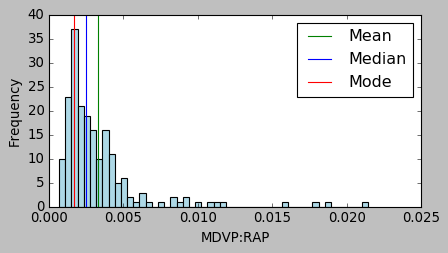


MDVP:PPQ
____________________
Mean:  0.003446358974358974 
Median:  0.0026899999999999997 
Mode:  0.0033200000000000005 
Skewness:  3.073892457888517
Positively Skewed


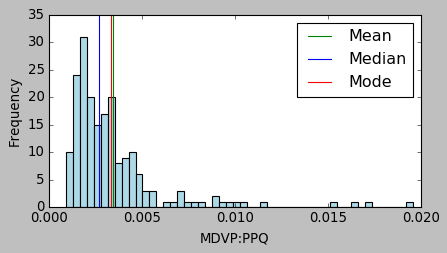


Jitter:DDP
____________________
Mean:  0.009919948717948712 
Median:  0.007490000000000001 
Mode:  0.00507 
Skewness:  3.3620584478857203
Positively Skewed


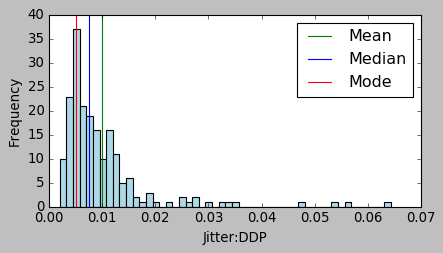


MDVP:Shimmer
____________________
Mean:  0.0297091282051282 
Median:  0.022969999999999997 
Mode:  0.0145 
Skewness:  1.6664804101559663
Positively Skewed


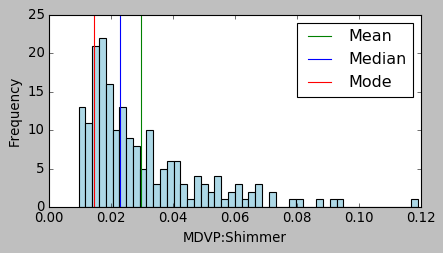


MDVP:Shimmer(dB)
____________________
Mean:  0.2822512820512821 
Median:  0.221 
Mode:  0.154 
Skewness:  1.999388639086127
Positively Skewed


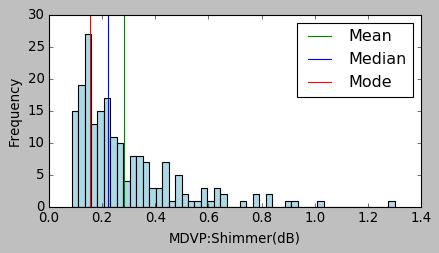


Shimmer:APQ3
____________________
Mean:  0.015664153846153845 
Median:  0.012790000000000001 
Mode:  0.00469 
Skewness:  1.5805763798815677
Positively Skewed


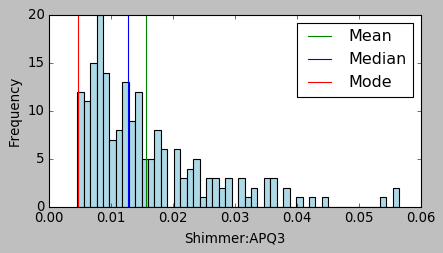


Shimmer:APQ5
____________________
Mean:  0.01787825641025642 
Median:  0.01347 
Mode:  0.00747 
Skewness:  1.798697066537622
Positively Skewed


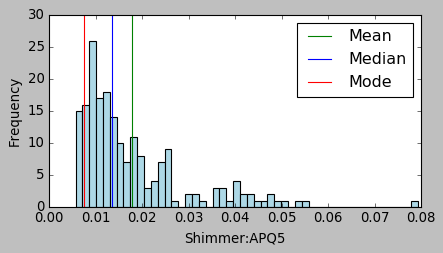


MDVP:APQ
____________________
Mean:  0.02408148717948718 
Median:  0.01826 
Mode:  0.00903 
Skewness:  2.618046502215422
Positively Skewed


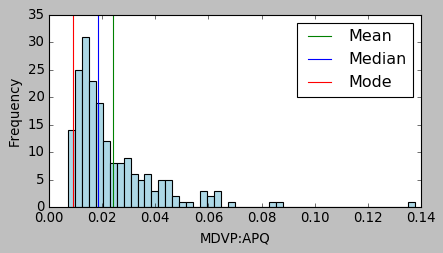


Shimmer:DDA
____________________
Mean:  0.04699261538461537 
Median:  0.038360000000000005 
Mode:  0.01567 
Skewness:  1.5806179936782263
Positively Skewed


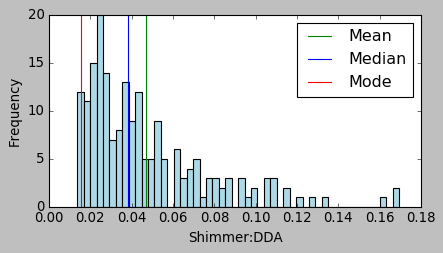


NHR
____________________
Mean:  0.024847076923076923 
Median:  0.01166 
Mode:  0.00231 
Skewness:  4.22070912913906
Positively Skewed


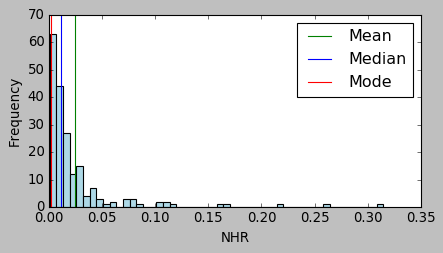


HNR
____________________
Mean:  21.885974358974366 
Median:  22.085 
Mode:  8.441 
Skewness:  -0.5143174975652068
Negatively Skewed


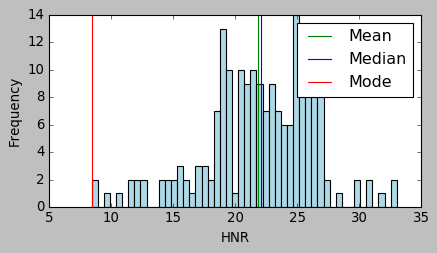


status
____________________
Mean:  0.7538461538461538 
Median:  1.0 
Mode:  1 
Skewness:  -1.1877273855919208
Negatively Skewed


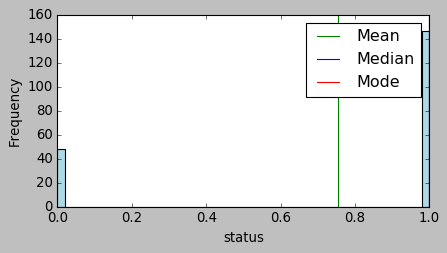


RPDE
____________________
Mean:  0.4985355384615386 
Median:  0.495954 
Mode:  0.25656999999999996 
Skewness:  -0.14340241379821705
Negatively Skewed


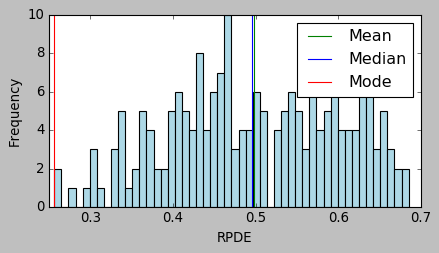


DFA
____________________
Mean:  0.7180990461538465 
Median:  0.722254 
Mode:  0.574282 
Skewness:  -0.03321366071383484
Negatively Skewed


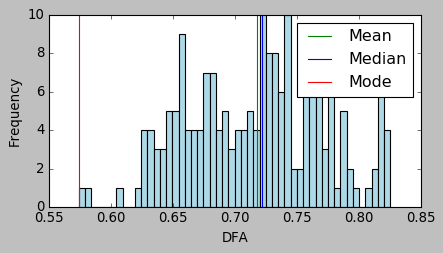


spread1
____________________
Mean:  -5.684396743589743 
Median:  -5.720868 
Mode:  -7.964983999999999 
Skewness:  0.4321389320131796
Positively Skewed


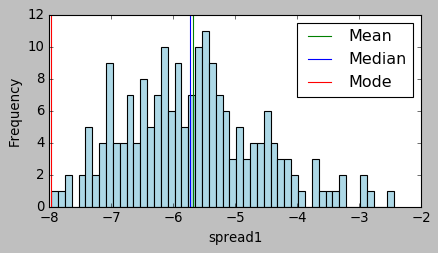


spread2
____________________
Mean:  0.2265103487179486 
Median:  0.218885 
Mode:  0.210279 
Skewness:  0.14443048549278412
Positively Skewed


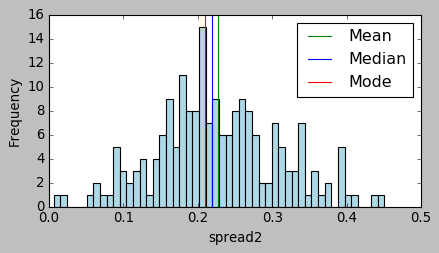


D2
____________________
Mean:  2.3818260871794874 
Median:  2.361532 
Mode:  1.4232870000000002 
Skewness:  0.4303838913329283
Positively Skewed


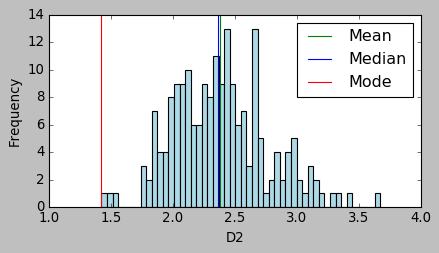


PPE
____________________
Mean:  0.20655164102564108 
Median:  0.194052 
Mode:  0.044538999999999995 
Skewness:  0.7974910716463578
Positively Skewed


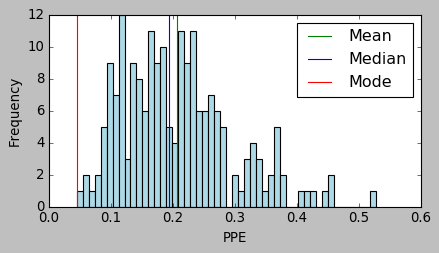

In [156]:
## Function where you pass the column name of the dataframe and this will do the univariate analysis
def univariate_analysis(col_name):
    Column=Parkinsons_df[col_name]
    mean=Column.mean()
    median=Column.median()
    mode=Column.mode()
    skew=Column.skew()
    print(col_name)
    print("____________________")
    
    print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0], '\nSkewness: ',skew)
    if skew>0:
        print("Positively Skewed")
    elif skew<0:
        print("Negatively Skewed")
    else:
        print("Symmetric Distribution")
    plt.figure(figsize=(6,3)) 
    plt.hist(Column,bins=50,color='lightblue') 
    plt.axvline(mean,color='green',label='Mean')     
    plt.axvline(median,color='blue',label='Median')
    plt.axvline(mode[0],color='red',label='Mode')
    plt.xlabel(col_name)  
    plt.ylabel('Frequency')   
    plt.legend()              
    plt.show()
    print("===================================================================================\n")



col_list=Parkinsons_df.columns.tolist()
col_list.remove('name')
for col in col_list:
    univariate_analysis(col)


### <font color=#00b3e5> Bivariate Analysis

<Figure size 1200x800 with 0 Axes>

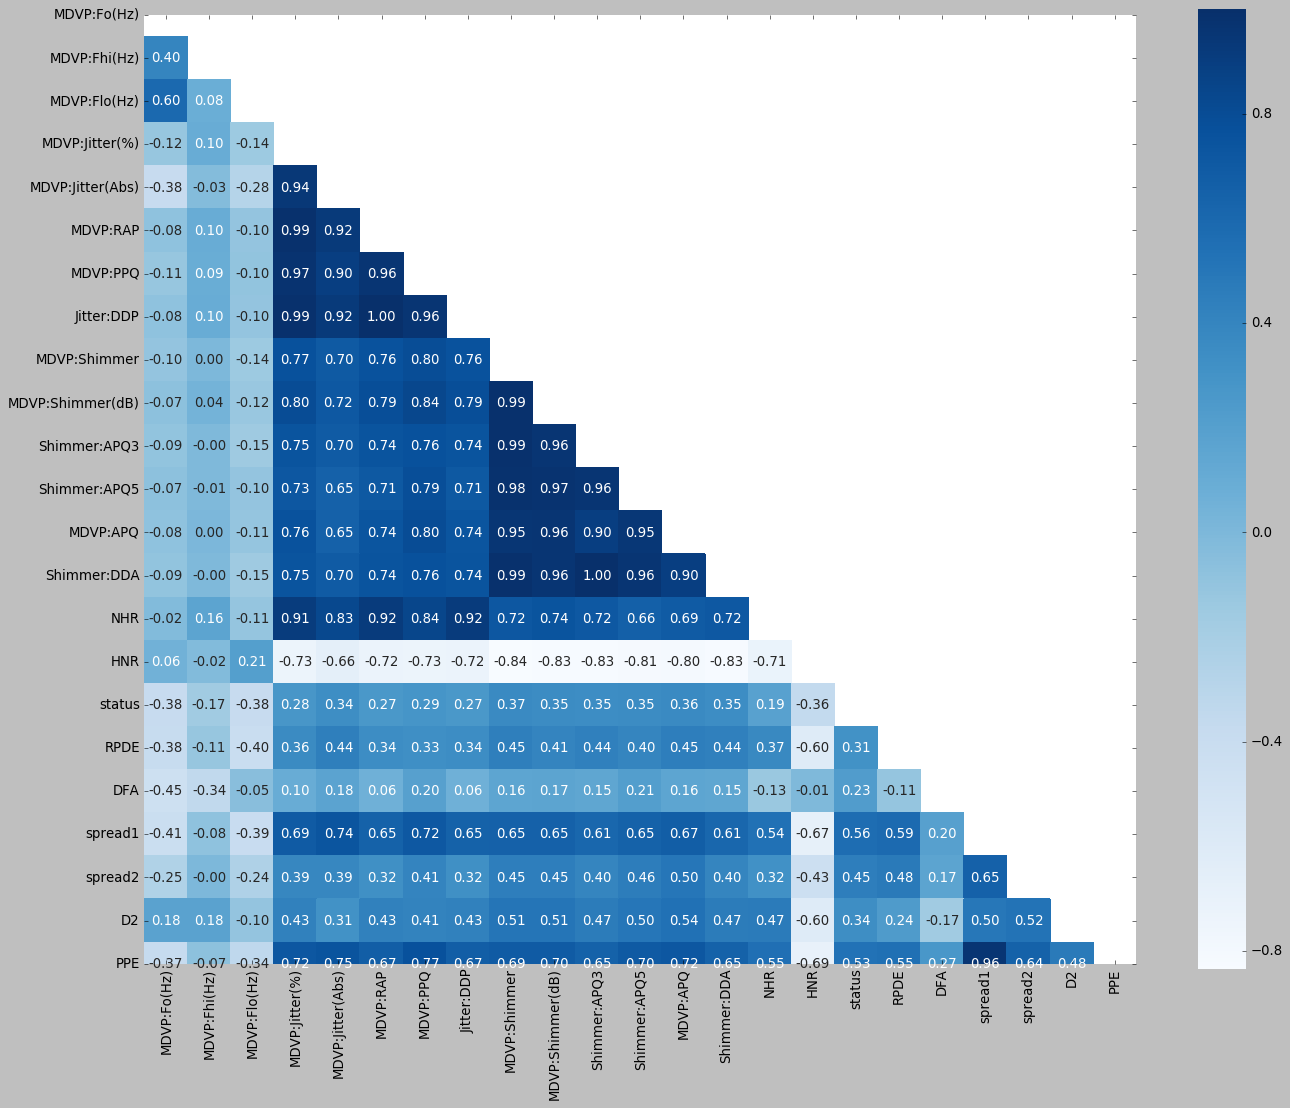

In [157]:
import pylab as pl
pl.figure(figsize = (15,10))

corr = Parkinsons_df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,15))
sns.heatmap(corr, mask=mask,annot=True,square=True, fmt='0.2f',cmap='Blues')

In [158]:
##Printing the columns' correlation percentage, where its greater than 97 (Threshold I considered)
corr=Parkinsons_df.corr()
Parkinsons_df_col=corr.columns


for col in Parkinsons_df_col:
             print(col)
             print('-------------------------------')
             print(corr[corr[col] >0.97][col])

MDVP:Fo(Hz)
-------------------------------
MDVP:Fo(Hz)    1.0
Name: MDVP:Fo(Hz), dtype: float64
MDVP:Fhi(Hz)
-------------------------------
MDVP:Fhi(Hz)    1.0
Name: MDVP:Fhi(Hz), dtype: float64
MDVP:Flo(Hz)
-------------------------------
MDVP:Flo(Hz)    1.0
Name: MDVP:Flo(Hz), dtype: float64
MDVP:Jitter(%)
-------------------------------
MDVP:Jitter(%)    1.000000
MDVP:RAP          0.990276
MDVP:PPQ          0.974256
Jitter:DDP        0.990276
Name: MDVP:Jitter(%), dtype: float64
MDVP:Jitter(Abs)
-------------------------------
MDVP:Jitter(Abs)    1.0
Name: MDVP:Jitter(Abs), dtype: float64
MDVP:RAP
-------------------------------
MDVP:Jitter(%)    0.990276
MDVP:RAP          1.000000
Jitter:DDP        1.000000
Name: MDVP:RAP, dtype: float64
MDVP:PPQ
-------------------------------
MDVP:Jitter(%)    0.974256
MDVP:PPQ          1.000000
Name: MDVP:PPQ, dtype: float64
Jitter:DDP
-------------------------------
MDVP:Jitter(%)    0.990276
MDVP:RAP          1.000000
Jitter:DDP        1.000

In [159]:
#Dropping the highly correlated columns
Parkinsons_df.drop(['MDVP:Jitter(%)','MDVP:RAP','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','PPE',],axis=1,inplace=True)

#### Pair Plot to determine the good features for this classification problem

C:\Users\sense\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sense\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


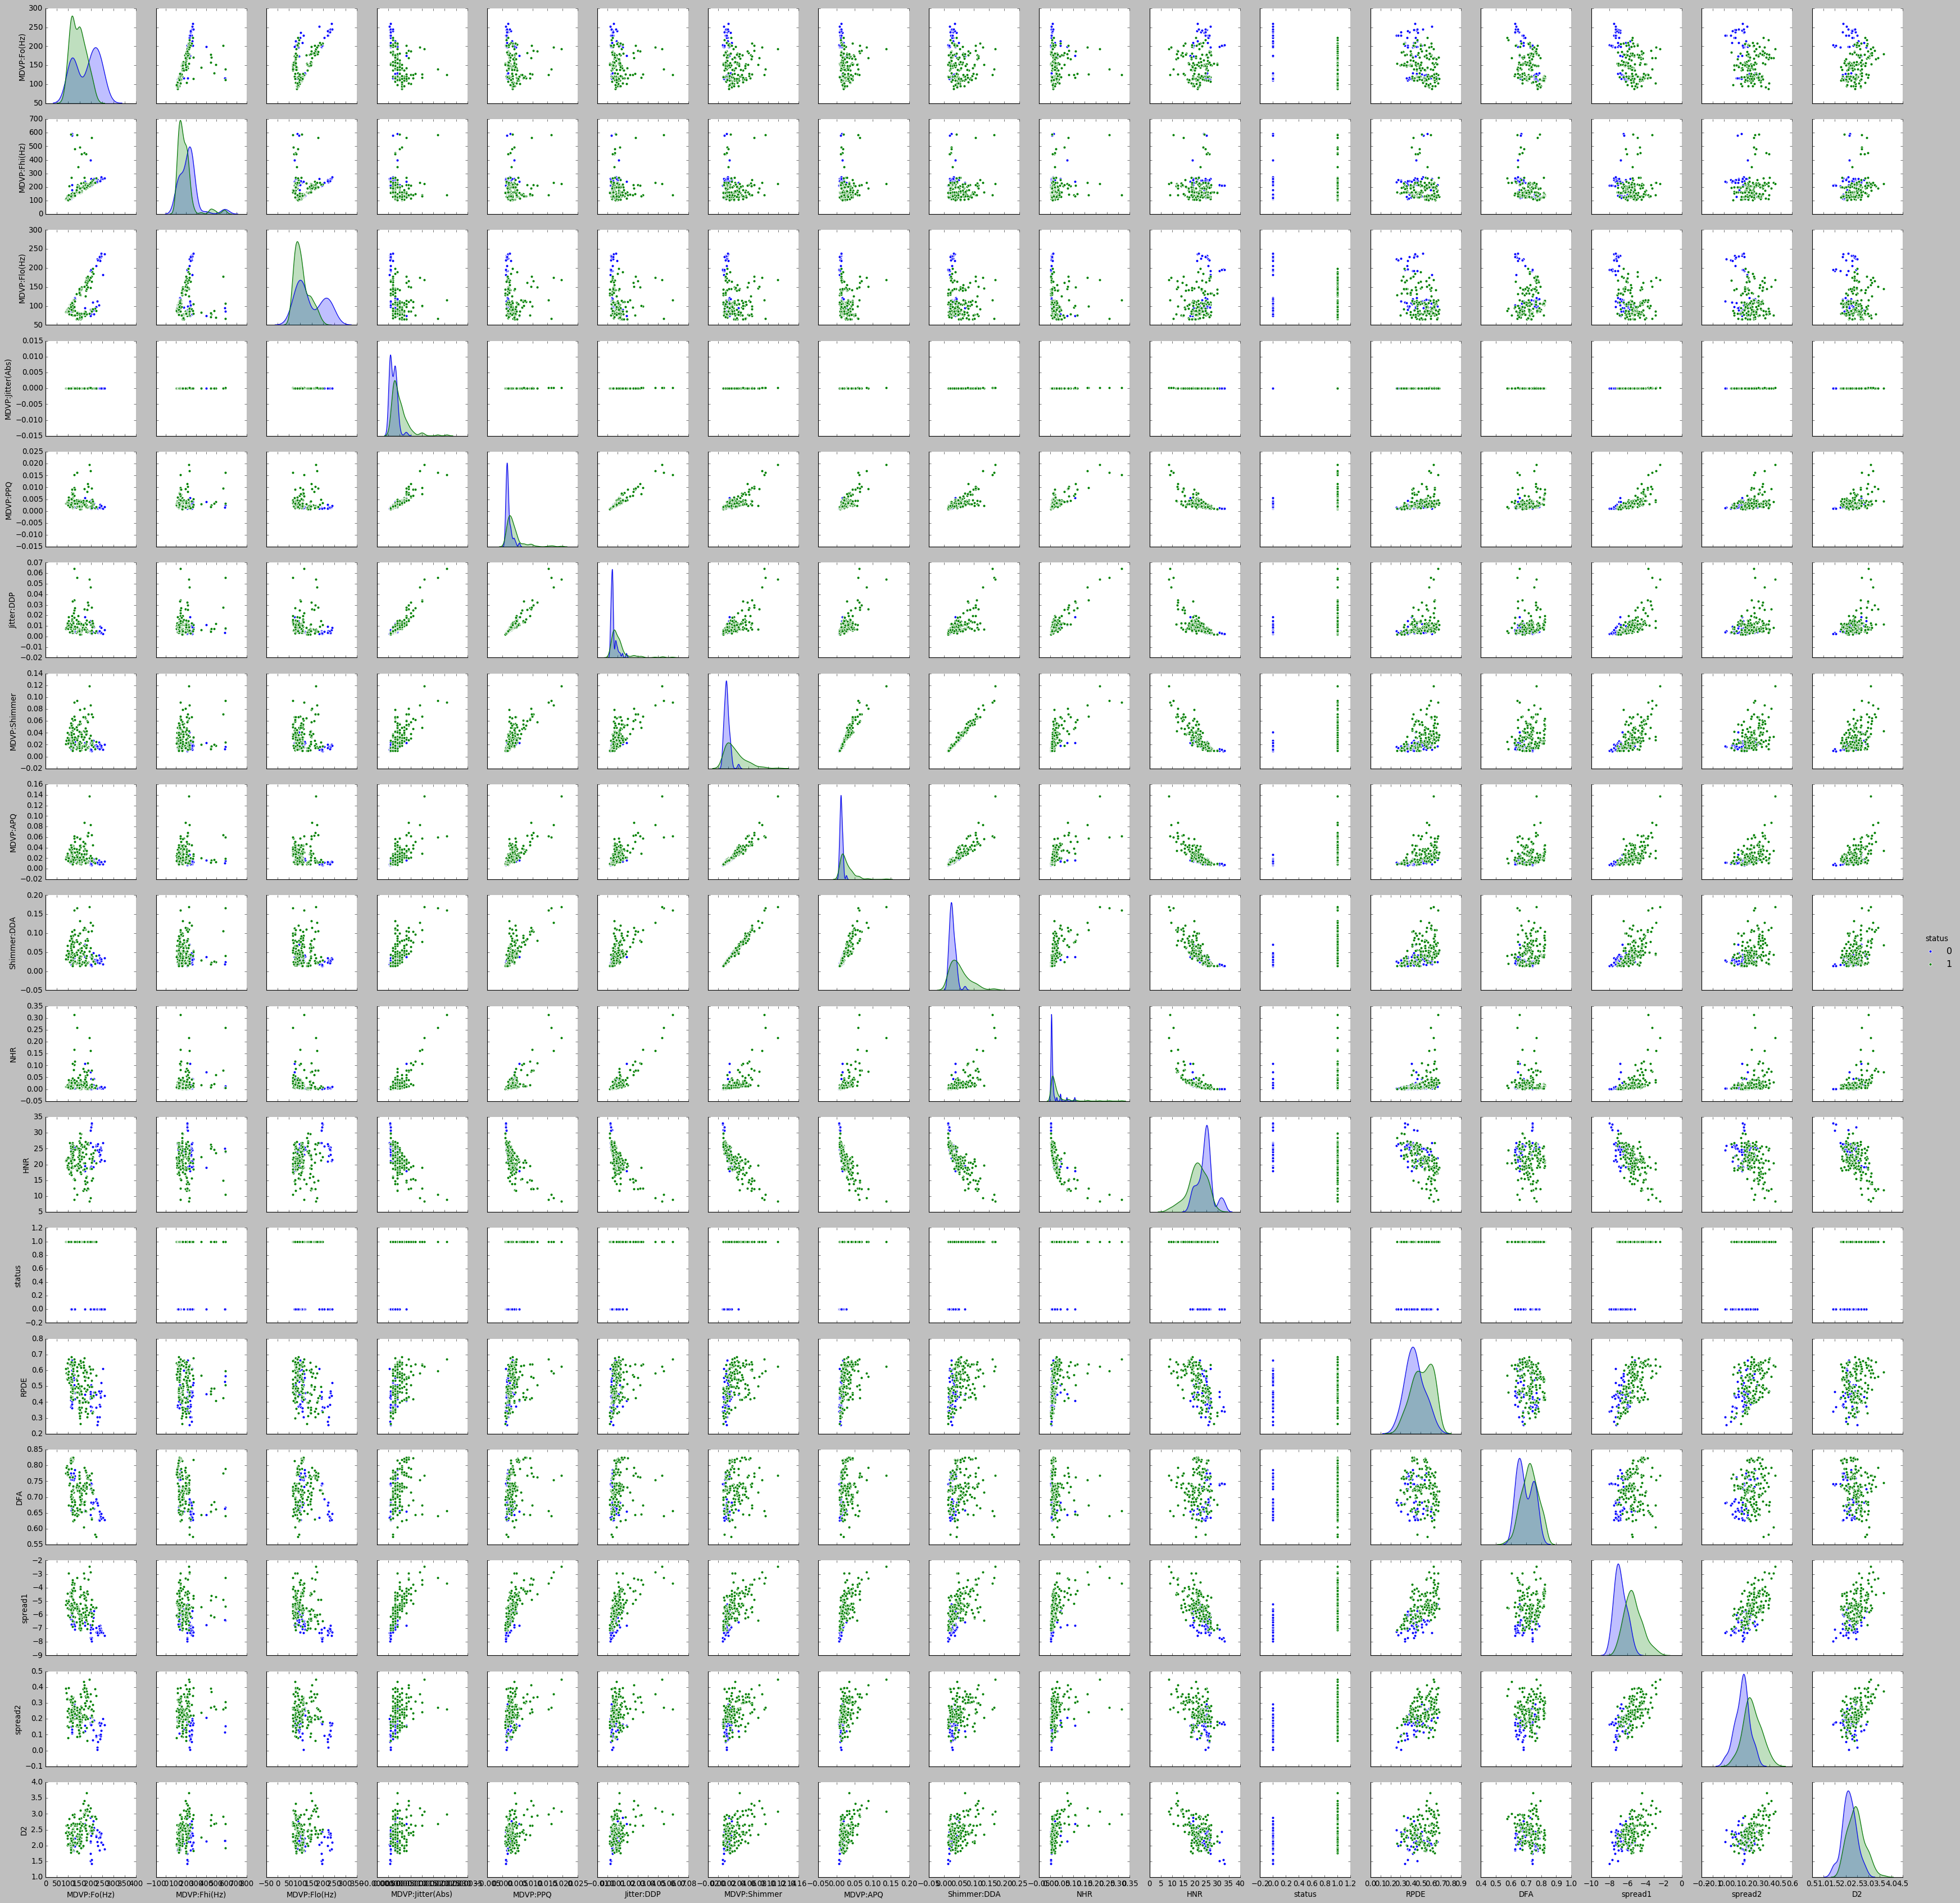

In [160]:
sns.pairplot(data=Parkinsons_df, diag_kind = "kde", hue="status")

#### Looks like for a higher range of frequencies, the initial 11 attributes potentially qualifies as good classifiers

## <font color=#00b3e5>Q4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [161]:
# splitting data into training and test set for independent attributes
# Stratify maintains the balance in the train and test data
X =  Parkinsons_df.drop(["status","name"], axis=1)
y =  Parkinsons_df.pop("status")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [162]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(136, 16) (59, 16) (136,) (59,)


#### Check for data balance

In [163]:
y_train.value_counts(normalize=True)

1    0.757353
0    0.242647
Name: status, dtype: float64

In [164]:
y_test.value_counts(normalize=True)

1    0.745763
0    0.254237
Name: status, dtype: float64

## <font color=#00b3e5>Q5. Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [165]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=10)
dt_model.fit(X_train, y_train )
dt_model.score(X_train, y_train)

1.0

## <font color=#00b3e5>Q6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [166]:
dt_model.score(X_test , y_test)

0.8983050847457628

In [167]:
test_pred = dt_model.predict(X_test)
print('Recall Score',recall_score(y_test, test_pred))
print('Precision :',precision_score(y_test, test_pred))
print('Accuracy :',accuracy_score(y_test, test_pred))


Recall Score 0.9545454545454546
Precision : 0.9130434782608695
Accuracy : 0.8983050847457628


In [168]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.91      0.95      0.93        44

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59



<Figure size 640x480 with 0 Axes>

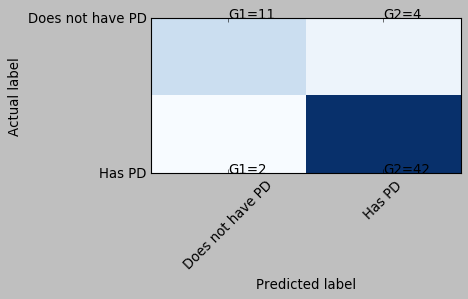

In [169]:
cm = metrics.confusion_matrix(y_test, test_pred)
plt.clf()
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Does not have PD','Has PD']
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

s = [['G1', 'G2'], ['G1','G2']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]))
plt.show()

## <font color=#00b3e5>Q7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

#### Regularizing the max_depth

In [170]:
train_accuracy = []
validation_accuracy=[]
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train )
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test , y_test))

In [171]:
Accuracy_df = pd.DataFrame({'max_depth':range(1,10),'train_accuracy':train_accuracy, 'validation_accuracy':validation_accuracy})
Accuracy_df.head(10)

,max_depth,train_accuracy,validation_accuracy
0,1,0.757353,0.745763
1,2,0.867647,0.881356
2,3,0.911765,0.864407
3,4,0.948529,0.915254
4,5,0.985294,0.915254
5,6,1.000000,0.898305
6,7,1.000000,0.898305
7,8,1.000000,0.898305
8,9,1.000000,0.898305


No handles with labels found to put in legend.


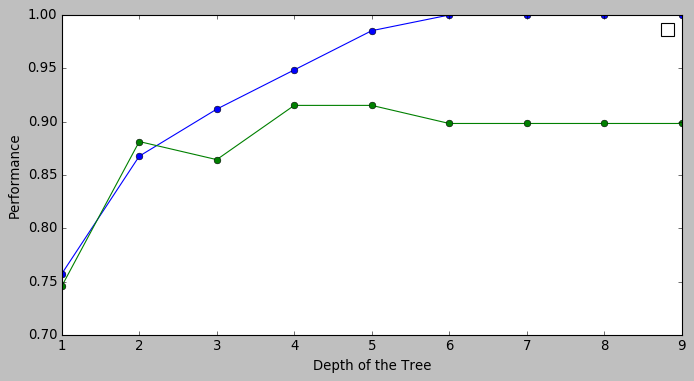

In [172]:
plt.figure(figsize=(10,5))
plt.plot(Accuracy_df['max_depth'], Accuracy_df['train_accuracy'], marker='o')
plt.plot(Accuracy_df['max_depth'], Accuracy_df['validation_accuracy'], marker='o')
plt.xlabel('Depth of the Tree')
plt.ylabel('Performance')
plt.legend()

#### We see the best value of max_depth is 4, after which the test score decreases

#### Regularizing the max_leaf_node

In [173]:
train_accuracy = []
validation_accuracy=[]
for leaf_node in range(2,20):
    dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=10, max_leaf_nodes=leaf_node)
    dt_model.fit(X_train, y_train )
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test ,y_test))

In [174]:
Accuracy_df = pd.DataFrame({'max_leaf_node':range(2,20),'train_accuracy':train_accuracy, 'validation_accuracy':validation_accuracy})
Accuracy_df.head(25)

,max_leaf_node,train_accuracy,validation_accuracy
0,2,0.757353,0.745763
1,3,0.867647,0.881356
2,4,0.897059,0.864407
3,5,0.911765,0.864407
4,6,0.933824,0.881356
5,7,0.948529,0.898305
6,8,0.948529,0.898305
7,9,0.948529,0.898305
8,10,0.948529,0.898305
9,11,0.948529,0.898305


#### Since there is no much improvement changing the max leaf node, we will leave it as default.

#### Decision trees are very much prone to overfitting. Regularization is important to tune the parameters, so that we get a balanced accurancy score between train and test data

In [175]:
from sklearn import tree

In [176]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=10)
dt_model.fit(X_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [177]:
dt_model.score(X_test, y_test)

0.9152542372881356

In [178]:
#!pip install graphviz

In [179]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=2,filled=2)

In [180]:
#!dot -Tpng tree.dot -otree.png

In [181]:
#import graphviz
#with open("tree.dot") as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)

## <font color=#00b3e5>Q8. Next implement the decision tree using Random Forest and find the accuracy (10 points)

In [182]:
from sklearn.ensemble import RandomForestClassifier

train_accuracy = []
validation_accuracy=[]
for estimator in range(1,15):
    rfcl = RandomForestClassifier(n_estimators = estimator, random_state=10)
    rfcl.fit(X_train, y_train )
    train_accuracy.append(rfcl.score(X_train, y_train))
    validation_accuracy.append(rfcl.score(X_test ,y_test))

In [183]:
Accuracy_df = pd.DataFrame({'estimator':range(1,15),'train_accuracy':train_accuracy, 'validation_accuracy':validation_accuracy})
Accuracy_df.head(15)

,estimator,train_accuracy,validation_accuracy
0,1,0.933824,0.881356
1,2,0.889706,0.813559
2,3,0.985294,0.915254
3,4,0.977941,0.881356
4,5,0.992647,0.898305
5,6,1.000000,0.898305
6,7,1.000000,0.915254
7,8,1.000000,0.949153
8,9,1.000000,0.966102
9,10,1.000000,0.949153


In [184]:
rfcl = RandomForestClassifier(n_estimators = 9, random_state=10)
rfcl.fit(X_train, y_train )
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

0.9661016949152542

#### Since the best performing n_estimator is 9, we run the random forest classifier with that value above.

In [185]:
test_pred = rfcl.predict(X_test)
print('Recall Score',recall_score(y_test, test_pred))
print('Precision :',precision_score(y_test, test_pred))
print('Accuracy :',accuracy_score(y_test, test_pred))

Recall Score 1.0
Precision : 0.9565217391304348
Accuracy : 0.9661016949152542


In [186]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.96      1.00      0.98        44

    accuracy                           0.97        59
   macro avg       0.98      0.93      0.95        59
weighted avg       0.97      0.97      0.97        59

